In [1]:
## ---- Global Cell Set Doublet Testing with Scrublet ---- 00685.00.00
## Load aggregated data set (previously unprocessed 10x data)
## Perform Scrublet analysis
## Save doublet scores, predicted doublets, and cell barcodes

In [2]:
## This notebook is a second look at the scrublet application (84.demo is the first)
## This time using the Alsaigh lab aggegated data

In [3]:
import scrublet as scr

In [4]:
%matplotlib inline
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import os

In [5]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [6]:
os.getcwd()

'/gpfs/home/devans/code/CSC.Run2'

In [9]:
input_dir = '/gpfs/group/torkamani/devans/CDC2/inputdat/outs/filtered_feature_bc_matrix/unzipped'
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + '/features.tsv', delimiter='\t', column=1))

print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 51981 rows, 33538 columns
Number of genes in gene list: 33538


In [23]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate = 0.10, n_neighbors = 100)

In [24]:
## May need to run command line:
## pip install scikit-image
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 24.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.8%
Elapsed time: 102.2 seconds


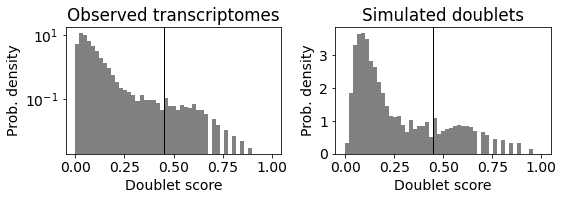

In [25]:
scrub.plot_histogram();

In [26]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...


/opt/applications/python/3.6.3/gnu/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../opt/applications/python/3.6.3/gnu/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


Done.


/gpfs/home/devans/.local/lib/python3.6/site-packages/scrublet/scrublet.py:550: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  cmap=cmap_use, vmin=vmin, vmax=vmax)
/gpfs/home/devans/.local/lib/python3.6/site-packages/scrublet/scrublet.py:562: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x[o], y[o], s=marker_size, edgecolors='', c=called_doubs[o], cmap=custom_cmap([[.7,.7,.7], [0,0,0]]))


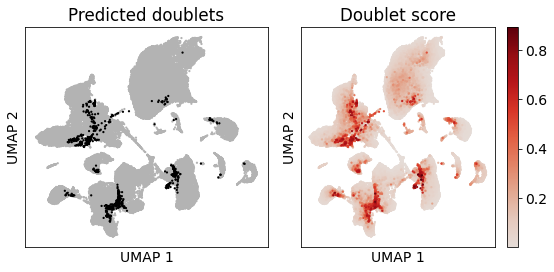

In [27]:
scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [29]:
print(doublet_scores[1:5])
print(predicted_doublets[1:5])
len(doublet_scores)

[0.04308898 0.02479339 0.04817861 0.21158129]
[False False False False]


51981

In [47]:
output_dir = '/gpfs/group/torkamani/devans/CDC/outputdat'
# np.savetxt(output_dir + '/doublet_scores.txt', doublet_scores)
# np.savetxt(output_dir + '/predicted_doublets.txt', predicted_doublets)

In [61]:
barcodes = np.loadtxt(input_dir + '/barcodes.tsv', dtype = 'str')
# np.savetxt(output_dir + '/barcodes.txt', barcodes, fmt='%s', delimiter = ',')


In [46]:
barcodes[1]

'AAACGAACAGGCTACC-1'